In [1]:
%rm -rf stonks/

In [2]:
%%capture
!git clone https://github.com/IS737StockPicker/stonks

In [3]:
import pandas as pd
from datetime import datetime
from datetime import date
stock_data= pd.read_csv('/content/stonks/Stocks_march_sept.csv')
#stock_data['Date'] = stock_data['Date'].dt.date(stock_data['Date'])

stock_data["Date"] = pd.to_datetime(stock_data["Date"], errors='coerce',utc=True)
stock_data['Date'] = stock_data['Date'].dt.strftime('%Y-%m-%d')
stock_data.head()
#stock_data.info()
#stock_data['Date'].day()
#stock_data.dtypes
#stock_data['Date'].astype()

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,XLB,XLP,SPY,^DJI,NDX
0,2022-03-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,2022-03-15,1,1,1,1,1,1,1,0,1,1,1,1,1,1.0
2,2022-03-16,0,1,0,1,1,1,1,1,1,1,0,1,1,1.0
3,2022-03-17,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
4,2022-03-18,1,1,0,1,1,1,1,1,1,1,1,1,1,1.0


In [4]:
Guardian_Data= pd.read_csv('/content/stonks/guardian_data.csv')
Guardian_Data.head()

,Date,Headline Mean,Body Mean,Headline Median,Body Median,Headline Min,Headline Max,Body Min,Body Max
0,2022-03-13,-0.08,-0.15,0.00,-0.88,-0.89,0.89,-1.0,1.0
1,2022-03-14,-0.13,-0.01,0.00,-0.00,-0.78,0.72,-1.0,1.0
2,2022-03-15,-0.20,-0.12,-0.15,-0.54,-0.93,0.79,-1.0,1.0
3,2022-03-16,-0.08,-0.16,0.00,-0.55,-0.82,0.69,-1.0,1.0
4,2022-03-17,-0.10,-0.24,0.00,-0.85,-0.83,0.77,-1.0,1.0


In [5]:
Huff_News_Data = pd.read_csv('/content/stonks/Huff_News_Avg_News_Sentiment.csv')
Huff_News_Data.head()

,Date,Headline Mean,Body Mean,Headline Median,Body Median,Headline Max,Body Max,Headline Min,Body Min
0,2022-03-13,-0.24,0.05,-0.21,0.19,0.00,0.44,-0.54,-0.61
1,2022-03-14,-0.12,-0.06,0.00,0.00,0.74,0.30,-0.80,-0.67
2,2022-03-15,-0.44,-0.39,-0.46,-0.47,0.00,0.13,-0.76,-0.85
3,2022-03-16,0.10,-0.09,0.00,-0.13,0.51,0.40,-0.25,-0.56
4,2022-03-17,-0.20,-0.14,-0.03,-0.03,0.56,0.00,-0.90,-0.49


In [6]:
NYT_Data = pd.read_csv('/content/stonks/ny_times_merged_data.csv')
NYT_Data.head()

,Date,Headline Mean,Headline Median,Body Mean,Body Median,Headline Max,Headline Min,Body Max,Body Min
0,2022-03-13,-0.11,0.0,0.22,0.25,0.84,-0.86,0.95,-0.86
1,2022-03-14,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
2,2022-03-15,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
3,2022-03-16,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
4,2022-03-17,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89


# Merge Stock Data and News Data

In [7]:
daily_stock_mixed_news = stock_data.merge(Guardian_Data, how='inner', on='Date')
daily_stock_mixed_news = daily_stock_mixed_news.merge(Huff_News_Data, how='inner', on='Date')
daily_stock_mixed_news = daily_stock_mixed_news.merge(NYT_Data, how='inner', on='Date')

daily_stock_mixed_news.columns = daily_stock_mixed_news.columns.str.replace(' ', '_')
daily_stock_mixed_news['XLE'].sum()
daily_stock_mixed_news['XLI'].sum()
daily_stock_mixed_news.info()
sum_column = daily_stock_mixed_news.sum(axis=0)
print (sum_column)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               125 non-null    object 
 1   XLE                125 non-null    int64  
 2   XLF                125 non-null    int64  
 3   XLU                125 non-null    int64  
 4   XLI                125 non-null    int64  
 5   XLK                125 non-null    int64  
 6   XLV                125 non-null    int64  
 7   XLY                125 non-null    int64  
 8   IYR                125 non-null    int64  
 9   AAPL               125 non-null    int64  
 10  XLB                125 non-null    int64  
 11  XLP                125 non-null    int64  
 12  SPY                125 non-null    int64  
 13  ^DJI               125 non-null    int64  
 14  NDX                125 non-null    float64
 15  Headline_Mean_x    125 non-null    float64
 16  Body_Mean_x        125 non

Preprocess the data:
Cleaning the data to avoid any missing values

In [8]:
daily_stock_mixed_news.dropna()

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,...,Headline_Min_y,Body_Min_y,Headline_Mean,Headline_Median,Body_Mean,Body_Median,Headline_Max,Headline_Min,Body_Max,Body_Min
0,2022-03-14,0,0,0,0,0,0,0,0,0,...,-0.80,-0.67,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
1,2022-03-15,1,1,1,1,1,1,1,0,1,...,-0.76,-0.85,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
2,2022-03-16,0,1,0,1,1,1,1,1,1,...,-0.25,-0.56,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
3,2022-03-17,1,1,1,1,1,1,1,1,1,...,-0.90,-0.49,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89
4,2022-03-18,1,1,0,1,1,1,1,1,1,...,-0.60,-0.76,-0.06,0.0,-0.05,-0.08,0.83,-0.82,0.86,-0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2022-09-07,1,1,1,1,1,1,1,1,1,...,-0.78,-0.57,0.09,0.0,-0.07,0.00,0.65,-0.86,0.84,-0.93
121,2022-09-08,0,1,1,1,1,1,1,1,0,...,-0.77,-0.83,-0.04,0.0,-0.02,0.00,0.75,-0.90,0.92,-0.93
122,2022-09-09,1,1,0,1,1,1,1,1,1,...,-0.60,0.00,-0.01,0.0,0.14,0.14,0.81,-0.80,0.85,-0.91
123,2022-09-12,1,1,1,1,1,1,1,1,1,...,-0.79,0.00,-0.10,0.0,-0.06,-0.13,0.75,-0.90,0.89,-0.89


In [13]:
# load the data
stocks_df = pd.read_csv('/content/stonks/master_data.csv')
stocks_df

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,...,Huff_headline_min,Huff_body_min,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median,NYT_headline_max,NYT_headline_min,NYT_body_max,NYT_body_min
0,2022-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.80,-0.67,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
1,2022-03-15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,-0.76,-0.85,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
2,2022-03-16,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.25,-0.56,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
3,2022-03-17,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.90,-0.49,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89
4,2022-03-18,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.60,-0.76,-0.06,0.0,-0.05,-0.08,0.83,-0.82,0.86,-0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2022-09-07,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.78,-0.57,0.09,0.0,-0.07,0.00,0.65,-0.86,0.84,-0.93
121,2022-09-08,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-0.77,-0.83,-0.04,0.0,-0.02,0.00,0.75,-0.90,0.92,-0.93
122,2022-09-09,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.60,0.00,-0.01,0.0,0.14,0.14,0.81,-0.80,0.85,-0.91
123,2022-09-12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.79,0.00,-0.10,0.0,-0.06,-0.13,0.75,-0.90,0.89,-0.89


In [15]:
tickers = stocks_df.iloc[:,:15]
tickers = tickers.drop(columns=['Date'])
tickers

,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,XLB,XLP,SPY,^DJI,NDX
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
121,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
122,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
123,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


# Data Analysis using Decision Tree Classifier to Predict Stock price Indicators Based on News Sentiment and Market Data. 


*master_data.csv*

**Model 1: Median headline for three news sites**

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

model_name = 'Model_1'

accuracy_scores = {}
for ticker in tickers:
    selected_var = [ticker, 'guardian_headline_median','Huff_headline_median','NYT_headline_median']
    accuracy_df = stocks_df[selected_var]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    
    X_train = X[:90]
    y_train = y[:90]
    X_valid = X[35:]
    y_valid = y[35:]
    
    stock_decision_tree = DecisionTreeClassifier(random_state=1)
    stock_decision_tree.fit(X_train, y_train.ravel())
    y_pred = stock_decision_tree.predict(X_valid)
    
    accuracy_scores[ticker] = accuracy_score(y_valid, y_pred)
    
accuracy_scores

{'XLE': 0.7444444444444445,
 'XLF': 0.7111111111111111,
 'XLU': 0.6888888888888889,
 'XLI': 0.7555555555555555,
 'XLK': 0.7111111111111111,
 'XLV': 0.7555555555555555,
 'XLY': 0.6777777777777778,
 'IYR': 0.7444444444444445,
 'AAPL': 0.7444444444444445,
 'XLB': 0.7333333333333333,
 'XLP': 0.6777777777777778,
 'SPY': 0.7444444444444445,
 '^DJI': 0.7,
 'NDX': 0.7333333333333333}

**Model 2: Mean headline for three news sites**

In [41]:
model_name = 'Model_2'

accuracy_scores = {}
for ticker in tickers:
    selected_var = [ticker, 'guardian_headline_mean','Huff_headline_mean','NYT_headline_mean']
    accuracy_df = stocks_df[selected_var]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    
    X_train = X[:90]
    y_train = y[:90]
    X_valid = X[35:]
    y_valid = y[35:]
    
    stock_decision_tree = DecisionTreeClassifier(random_state=1)
    stock_decision_tree.fit(X_train, y_train.ravel())
    y_pred = stock_decision_tree.predict(X_valid)
    
    accuracy_scores[ticker] = accuracy_score(y_valid, y_pred)
    
accuracy_scores

{'XLE': 0.8,
 'XLF': 0.8,
 'XLU': 0.8222222222222222,
 'XLI': 0.8111111111111111,
 'XLK': 0.8222222222222222,
 'XLV': 0.8,
 'XLY': 0.8333333333333334,
 'IYR': 0.8777777777777778,
 'AAPL': 0.8222222222222222,
 'XLB': 0.7888888888888889,
 'XLP': 0.8,
 'SPY': 0.7666666666666667,
 '^DJI': 0.8333333333333334,
 'NDX': 0.8222222222222222}

**Model 3: Median body for three news sites**

In [42]:
model_name = 'Model_3'

accuracy_scores = {}
for ticker in tickers:
    selected_var = [ticker, 'guardian_body_median','Huff_body_median','NYT_body_median']
    accuracy_df = stocks_df[selected_var]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    
    X_train = X[:90]
    y_train = y[:90]
    X_valid = X[35:]
    y_valid = y[35:]
    
    stock_decision_tree = DecisionTreeClassifier(random_state=1)
    stock_decision_tree.fit(X_train, y_train.ravel())
    y_pred = stock_decision_tree.predict(X_valid)
    
    accuracy_scores[ticker] = accuracy_score(y_valid, y_pred)
    
accuracy_scores

{'XLE': 0.8222222222222222,
 'XLF': 0.8,
 'XLU': 0.7888888888888889,
 'XLI': 0.8,
 'XLK': 0.7555555555555555,
 'XLV': 0.7888888888888889,
 'XLY': 0.8,
 'IYR': 0.8,
 'AAPL': 0.7888888888888889,
 'XLB': 0.7555555555555555,
 'XLP': 0.8,
 'SPY': 0.7666666666666667,
 '^DJI': 0.7444444444444445,
 'NDX': 0.7888888888888889}

**Model 4: Mean body for three news**

In [43]:
model_name = 'Model_4'

accuracy_scores = {}
for ticker in tickers:
    selected_var = [ticker, 'guardian_body_mean','Huff_body_mean','NYT_body_mean']
    accuracy_df = stocks_df[selected_var]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    
    X_train = X[:90]
    y_train = y[:90]
    X_valid = X[35:]
    y_valid = y[35:]
    
    stock_decision_tree = DecisionTreeClassifier(random_state=1)
    stock_decision_tree.fit(X_train, y_train.ravel())
    y_pred = stock_decision_tree.predict(X_valid)
    
    accuracy_scores[ticker] = accuracy_score(y_valid, y_pred)
    
accuracy_scores

{'XLE': 0.8111111111111111,
 'XLF': 0.7777777777777778,
 'XLU': 0.7222222222222222,
 'XLI': 0.8222222222222222,
 'XLK': 0.7888888888888889,
 'XLV': 0.8222222222222222,
 'XLY': 0.8222222222222222,
 'IYR': 0.8222222222222222,
 'AAPL': 0.8333333333333334,
 'XLB': 0.7555555555555555,
 'XLP': 0.7444444444444445,
 'SPY': 0.8333333333333334,
 '^DJI': 0.7555555555555555,
 'NDX': 0.8555555555555555}

**Model 5: Min/Mix headline for three news sites**

In [44]:
model_name = 'Model_5'

accuracy_scores = {}
for ticker in tickers:
    selected_var = [ticker, 'guardian_headline_min','guardian_headline_max','Huff_headline_min','Huff_headline_max','NYT_headline_min','NYT_headline_max']
    accuracy_df = stocks_df[selected_var]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    
    X_train = X[:90]
    y_train = y[:90]
    X_valid = X[35:]
    y_valid = y[35:]
    
    stock_decision_tree = DecisionTreeClassifier(random_state=1)
    stock_decision_tree.fit(X_train, y_train.ravel())
    y_pred = stock_decision_tree.predict(X_valid)
    
    accuracy_scores[ticker] = accuracy_score(y_valid, y_pred)
    
accuracy_scores

{'XLE': 0.8222222222222222,
 'XLF': 0.8222222222222222,
 'XLU': 0.8111111111111111,
 'XLI': 0.8222222222222222,
 'XLK': 0.8333333333333334,
 'XLV': 0.8444444444444444,
 'XLY': 0.8444444444444444,
 'IYR': 0.8111111111111111,
 'AAPL': 0.8333333333333334,
 'XLB': 0.8,
 'XLP': 0.8888888888888888,
 'SPY': 0.8222222222222222,
 '^DJI': 0.8444444444444444,
 'NDX': 0.8444444444444444}

**Model 6: Min/Max body for three news sites**

In [45]:
model_name = 'Model_6'

accuracy_scores = {}
for ticker in tickers:
    selected_var = [ticker, 'guardian_body_min','guardian_body_max','Huff_body_min','Huff_body_max','NYT_body_min','NYT_body_max']
    accuracy_df = stocks_df[selected_var]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    
    X_train = X[:90]
    y_train = y[:90]
    X_valid = X[35:]
    y_valid = y[35:]
    
    stock_decision_tree = DecisionTreeClassifier(random_state=1)
    stock_decision_tree.fit(X_train, y_train.ravel())
    y_pred = stock_decision_tree.predict(X_valid)
    
    accuracy_scores[ticker] = accuracy_score(y_valid, y_pred)
    
accuracy_scores

{'XLE': 0.8222222222222222,
 'XLF': 0.8111111111111111,
 'XLU': 0.8222222222222222,
 'XLI': 0.8222222222222222,
 'XLK': 0.8444444444444444,
 'XLV': 0.8111111111111111,
 'XLY': 0.8777777777777778,
 'IYR': 0.8222222222222222,
 'AAPL': 0.8444444444444444,
 'XLB': 0.7555555555555555,
 'XLP': 0.9,
 'SPY': 0.8555555555555555,
 '^DJI': 0.7888888888888889,
 'NDX': 0.8666666666666667}

# Using Decision Tree Classifier Model to predict future stock prices

In [30]:
# Loading future data set
master_data_future = pd.read_csv('/content/stonks/master_data_future.csv')
master_data_future

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,...,Huff_headline_min,Huff_body_min,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median,NYT_headline_max,NYT_headline_min,NYT_body_max,NYT_body_min
0,2022-03-14,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,-0.80,-0.67,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
1,2022-03-15,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.76,-0.85,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
2,2022-03-16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.25,-0.56,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
3,2022-03-17,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.90,-0.49,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89
4,2022-03-18,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.60,-0.76,-0.06,0.0,-0.05,-0.08,0.83,-0.82,0.86,-0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2022-09-07,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-0.78,-0.57,0.09,0.0,-0.07,0.00,0.65,-0.86,0.84,-0.93
121,2022-09-08,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.77,-0.83,-0.04,0.0,-0.02,0.00,0.75,-0.90,0.92,-0.93
122,2022-09-09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.60,0.00,-0.01,0.0,0.14,0.14,0.81,-0.80,0.85,-0.91
123,2022-09-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.79,0.00,-0.10,0.0,-0.06,-0.13,0.75,-0.90,0.89,-0.89


In [31]:
#Seperating Tickers from CSV Dataset
future_tickers = master_data_future.iloc[:,:15]
future_tickers = future_tickers.drop(columns=['Date'])
future_tickers

,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,XLB,XLP,SPY,^DJI,NDX
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
121,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
122,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Model 1: Median headline for three news sites**

In [46]:
model_name = 'Model_1_Future'

accuracy_scores = {}
for ticker in future_tickers:
    selected_var = [ticker, 'guardian_headline_median','Huff_headline_median','NYT_headline_median']
    accuracy_df = master_data_future[selected_var]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    
    X_train = X[:90]
    y_train = y[:90]
    X_valid = X[35:]
    y_valid = y[35:]
    
    stock_decision_tree = DecisionTreeClassifier(random_state=1)
    stock_decision_tree.fit(X_train, y_train.ravel())
    y_pred = stock_decision_tree.predict(X_valid)
    
    accuracy_scores[ticker] = accuracy_score(y_valid, y_pred)
    
accuracy_scores

{'XLE': 0.7777777777777778,
 'XLF': 0.7222222222222222,
 'XLU': 0.7777777777777778,
 'XLI': 0.7222222222222222,
 'XLK': 0.7222222222222222,
 'XLV': 0.7555555555555555,
 'XLY': 0.7444444444444445,
 'IYR': 0.7555555555555555,
 'AAPL': 0.7444444444444445,
 'XLB': 0.7222222222222222,
 'XLP': 0.7555555555555555,
 'SPY': 0.7555555555555555,
 '^DJI': 0.7111111111111111,
 'NDX': 0.7111111111111111}

**Model 2: Mean headline for three news sites**

In [47]:
model_name = 'Model_2_Future'

accuracy_scores = {}
for ticker in future_tickers:
    selected_var = [ticker, 'guardian_headline_mean','Huff_headline_mean','NYT_headline_mean']
    accuracy_df = master_data_future[selected_var]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    
    X_train = X[:90]
    y_train = y[:90]
    X_valid = X[35:]
    y_valid = y[35:]
    
    stock_decision_tree = DecisionTreeClassifier(random_state=1)
    stock_decision_tree.fit(X_train, y_train.ravel())
    y_pred = stock_decision_tree.predict(X_valid)
    
    accuracy_scores[ticker] = accuracy_score(y_valid, y_pred)
    
accuracy_scores

{'XLE': 0.8444444444444444,
 'XLF': 0.8111111111111111,
 'XLU': 0.8222222222222222,
 'XLI': 0.8555555555555555,
 'XLK': 0.7777777777777778,
 'XLV': 0.8111111111111111,
 'XLY': 0.7777777777777778,
 'IYR': 0.8,
 'AAPL': 0.8111111111111111,
 'XLB': 0.7666666666666667,
 'XLP': 0.8444444444444444,
 'SPY': 0.8222222222222222,
 '^DJI': 0.8,
 'NDX': 0.7888888888888889}

**Model 3: Median body for three news sites**

In [48]:
model_name = 'Model_3_Future'

accuracy_scores = {}
for ticker in future_tickers:
    selected_var = [ticker, 'guardian_body_median','Huff_body_median','NYT_body_median']
    accuracy_df = master_data_future[selected_var]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    
    X_train = X[:90]
    y_train = y[:90]
    X_valid = X[35:]
    y_valid = y[35:]
    
    stock_decision_tree = DecisionTreeClassifier(random_state=1)
    stock_decision_tree.fit(X_train, y_train.ravel())
    y_pred = stock_decision_tree.predict(X_valid)
    
    accuracy_scores[ticker] = accuracy_score(y_valid, y_pred)
    
accuracy_scores

{'XLE': 0.8222222222222222,
 'XLF': 0.7222222222222222,
 'XLU': 0.7888888888888889,
 'XLI': 0.7555555555555555,
 'XLK': 0.7444444444444445,
 'XLV': 0.8,
 'XLY': 0.7222222222222222,
 'IYR': 0.7444444444444445,
 'AAPL': 0.7444444444444445,
 'XLB': 0.8111111111111111,
 'XLP': 0.7777777777777778,
 'SPY': 0.7666666666666667,
 '^DJI': 0.7111111111111111,
 'NDX': 0.8}

**Model 4: Mean body for three news sites**

In [49]:
model_name = 'Model_4_Future'

accuracy_scores = {}
for ticker in future_tickers:
    selected_var = [ticker, 'guardian_body_mean','Huff_body_mean','NYT_body_mean']
    accuracy_df = master_data_future[selected_var]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    
    X_train = X[:90]
    y_train = y[:90]
    X_valid = X[35:]
    y_valid = y[35:]
    
    stock_decision_tree = DecisionTreeClassifier(random_state=1)
    stock_decision_tree.fit(X_train, y_train.ravel())
    y_pred = stock_decision_tree.predict(X_valid)
    
    accuracy_scores[ticker] = accuracy_score(y_valid, y_pred)
    
accuracy_scores

{'XLE': 0.7444444444444445,
 'XLF': 0.8555555555555555,
 'XLU': 0.7888888888888889,
 'XLI': 0.7888888888888889,
 'XLK': 0.8,
 'XLV': 0.7777777777777778,
 'XLY': 0.7777777777777778,
 'IYR': 0.7888888888888889,
 'AAPL': 0.8222222222222222,
 'XLB': 0.8333333333333334,
 'XLP': 0.7555555555555555,
 'SPY': 0.7888888888888889,
 '^DJI': 0.7777777777777778,
 'NDX': 0.7777777777777778}

**Model 5: Min/Mix headline for three news sites**

In [50]:
model_name = 'Model_5_Future'

accuracy_scores = {}
for ticker in future_tickers:
    selected_var = [ticker, 'guardian_headline_min','guardian_headline_max','Huff_headline_min','Huff_headline_max','NYT_headline_min','NYT_headline_max']
    accuracy_df = master_data_future[selected_var]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    
    X_train = X[:90]
    y_train = y[:90]
    X_valid = X[35:]
    y_valid = y[35:]
    
    stock_decision_tree = DecisionTreeClassifier(random_state=1)
    stock_decision_tree.fit(X_train, y_train.ravel())
    y_pred = stock_decision_tree.predict(X_valid)
    
    accuracy_scores[ticker] = accuracy_score(y_valid, y_pred)
    
accuracy_scores

{'XLE': 0.7222222222222222,
 'XLF': 0.7333333333333333,
 'XLU': 0.8888888888888888,
 'XLI': 0.7444444444444445,
 'XLK': 0.8111111111111111,
 'XLV': 0.7444444444444445,
 'XLY': 0.7444444444444445,
 'IYR': 0.8333333333333334,
 'AAPL': 0.7666666666666667,
 'XLB': 0.7555555555555555,
 'XLP': 0.7777777777777778,
 'SPY': 0.8,
 '^DJI': 0.8333333333333334,
 'NDX': 0.7444444444444445}

**Model 6: Min/Max body for three news sites**

In [51]:
model_name = 'Model_6_Future'

accuracy_scores = {}
for ticker in future_tickers:
    selected_var = [ticker, 'guardian_body_min','guardian_body_max','Huff_body_min','Huff_body_max','NYT_body_min','NYT_body_max']
    accuracy_df = master_data_future[selected_var]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    
    X_train = X[:90]
    y_train = y[:90]
    X_valid = X[35:]
    y_valid = y[35:]
    
    stock_decision_tree = DecisionTreeClassifier(random_state=1)
    stock_decision_tree.fit(X_train, y_train.ravel())
    y_pred = stock_decision_tree.predict(X_valid)
    
    accuracy_scores[ticker] = accuracy_score(y_valid, y_pred)
    
accuracy_scores

{'XLE': 0.8111111111111111,
 'XLF': 0.7666666666666667,
 'XLU': 0.8111111111111111,
 'XLI': 0.8,
 'XLK': 0.8555555555555555,
 'XLV': 0.8333333333333334,
 'XLY': 0.8444444444444444,
 'IYR': 0.8222222222222222,
 'AAPL': 0.8333333333333334,
 'XLB': 0.8555555555555555,
 'XLP': 0.8,
 'SPY': 0.8777777777777778,
 '^DJI': 0.7777777777777778,
 'NDX': 0.8444444444444444}

# Combining the 2 dataset together into one CSV file 

In [54]:
# List of different combinations of selected_var
selected_var_combinations = [
    ['Model_1', ['guardian_headline_median','Huff_headline_median','NYT_headline_median']],
    ['Model_2', ['guardian_headline_mean','Huff_headline_mean','NYT_headline_mean']],
    ['Model_3', ['guardian_body_median','Huff_body_median','NYT_body_median']],
    ['Model_4',['guardian_body_mean','Huff_body_mean','NYT_body_mean']],
    ['Model_5',['guardian_headline_min','guardian_headline_max','Huff_headline_min','Huff_headline_max','NYT_headline_min','NYT_headline_max']],
    ['Model_6',['guardian_body_min','guardian_body_max','Huff_body_min','Huff_body_max','NYT_body_min','NYT_body_max']],
    ['Model_1_Future',['guardian_headline_median','Huff_headline_median','NYT_headline_median']],
    ['Model_2_Future',['guardian_headline_mean','Huff_headline_mean','NYT_headline_mean']],
    ['Model_3_Future',['guardian_body_median','Huff_body_median','NYT_body_median']],
    ['Model_4_Future',['guardian_body_mean','Huff_body_mean','NYT_body_mean']],
    ['Model_5_Future',['guardian_headline_min','guardian_headline_max','Huff_headline_min','Huff_headline_max','NYT_headline_min','NYT_headline_max']],
    ['Model_6_Future',['guardian_body_min','guardian_body_max','Huff_body_min','Huff_body_max','NYT_body_min','NYT_body_max']]
]

# Initialize an empty dictionary to store the accuracy scores
combined_results = {}

# Loop through the datasets
datasets = [stocks_df, master_data_future]
for idx, dataset in enumerate(datasets, start=1):
    dataset_results = {}

    for combination_name, selected_var in selected_var_combinations:
        accuracy_scores = {}
        
        for ticker in tickers:
            selected_columns = [ticker] + selected_var
            accuracy_df = dataset[selected_columns]
            
            y_nonscaled = accuracy_df[[ticker]]
            X_nonscaled = accuracy_df.drop(columns=[ticker])

            scaleOutput = MinMaxScaler()
            scaleInput = MinMaxScaler()
            y = scaleOutput.fit_transform(y_nonscaled)
            X = scaleInput.fit_transform(X_nonscaled)

            X_train = X[:90]
            y_train = y[:90]
            X_valid = X[35:]
            y_valid = y[35:]

            stock_decision_tree = DecisionTreeClassifier(random_state=1)
            stock_decision_tree.fit(X_train, y_train.ravel())
            y_pred = stock_decision_tree.predict(X_valid)

            accuracy = accuracy_score(y_valid, y_pred)
            rounded_accuracy = round(accuracy, 2)
            accuracy_scores[ticker] = rounded_accuracy

        # Store the accuracy scores for the current combination in the dataset_results dictionary
        dataset_results[combination_name] = accuracy_scores
    
    # Store the dataset_results in the combined_results dictionary
    combined_results[f'Dataset {idx}'] = dataset_results

# Convert the combined_results dictionary to a MultiIndex DataFrame
combined_results_df = pd.concat({k: pd.DataFrame(v) for k, v in combined_results.items()}, axis=1)

# Save the results to a CSV file
combined_results_df.to_csv('combined_results.csv', index=True)

combined_results_df

Dataset 1                                                         \
       Model_1 Model_2 Model_3 Model_4 Model_5 Model_6 Model_1_Future   
XLE       0.74    0.80    0.82    0.81    0.82    0.82           0.74   
XLF       0.71    0.80    0.80    0.78    0.82    0.81           0.71   
XLU       0.69    0.82    0.79    0.72    0.81    0.82           0.69   
XLI       0.76    0.81    0.80    0.82    0.82    0.82           0.76   
XLK       0.71    0.82    0.76    0.79    0.83    0.84           0.71   
XLV       0.76    0.80    0.79    0.82    0.84    0.81           0.76   
XLY       0.68    0.83    0.80    0.82    0.84    0.88           0.68   
IYR       0.74    0.88    0.80    0.82    0.81    0.82           0.74   
AAPL      0.74    0.82    0.79    0.83    0.83    0.84           0.74   
XLB       0.73    0.79    0.76    0.76    0.80    0.76           0.73   
XLP       0.68    0.80    0.80    0.74    0.89    0.90           0.68   
SPY       0.74    0.77    0.77    0.83    0.82    0.86           0.74   
^DJI      0.70    0.83    0.74    0.76    0.84    0.79           0.70   
NDX       0.73    0.82    0.79    0.86    0.84    0.87           0.73   

                                                   ... Dataset 2          \
     Model_2_Future Model_3_Future Model_4_Future  ...   Model_3 Model_4   
XLE            0.80           0.82           0.81  ...      0.82    0.74   
XLF            0.80           0.80           0.78  ...      0.72    0.86   
XLU            0.82           0.79           0.72  ...      0.79    0.79   
XLI            0.81           0.80           0.82  ...      0.76    0.79   
XLK            0.82           0.76           0.79  ...      0.74    0.80   
XLV            0.80           0.79           0.82  ...      0.80    0.78   
XLY            0.83           0.80           0.82  ...      0.72    0.78   
IYR            0.88           0.80           0.82  ...      0.74    0.79   
AAPL           0.82           0.79           0.83  ...      0.74    0.82   
XLB            0.79           0.76           0.76  ...      0.81    0.83   
XLP            0.80           0.80           0.74  ...      0.78    0.76   
SPY            0.77           0.77           0.83  ...      0.77    0.79   
^DJI           0.83           0.74           0.76  ...      0.71    0.78   
NDX            0.82           0.79           0.86  ...      0.80    0.78   

                                                                   \
     Model_5 Model_6 Model_1_Future Model_2_Future Model_3_Future   
XLE     0.72    0.81           0.78           0.84           0.82   
XLF     0.73    0.77           0.72           0.81           0.72   
XLU     0.89    0.81           0.78           0.82           0.79   
XLI     0.74    0.80           0.72           0.86           0.76   
XLK     0.81    0.86           0.72           0.78           0.74   
XLV     0.74    0.83           0.76           0.81           0.80   
XLY     0.74    0.84           0.74           0.78           0.72   
IYR     0.83    0.82           0.76           0.80           0.74   
AAPL    0.77    0.83           0.74           0.81           0.74   
XLB     0.76    0.86           0.72           0.77           0.81   
XLP     0.78    0.80           0.76           0.84           0.78   
SPY     0.80    0.88           0.76           0.82           0.77   
^DJI    0.83    0.78           0.71           0.80           0.71   
NDX     0.74    0.84           0.71           0.79           0.80   

                                                   
     Model_4_Future Model_5_Future Model_6_Future  
XLE            0.74           0.72           0.81  
XLF            0.86           0.73           0.77  
XLU            0.79           0.89           0.81  
XLI            0.79           0.74           0.80  
XLK            0.80           0.81           0.86  
XLV            0.78           0.74           0.83  
XLY            0.78           0.74           0.84  
IYR            0.79           0.83           0

# Visualizing the outcome by creating a grouped bar chart using the matplotlib and seaborn libraries.

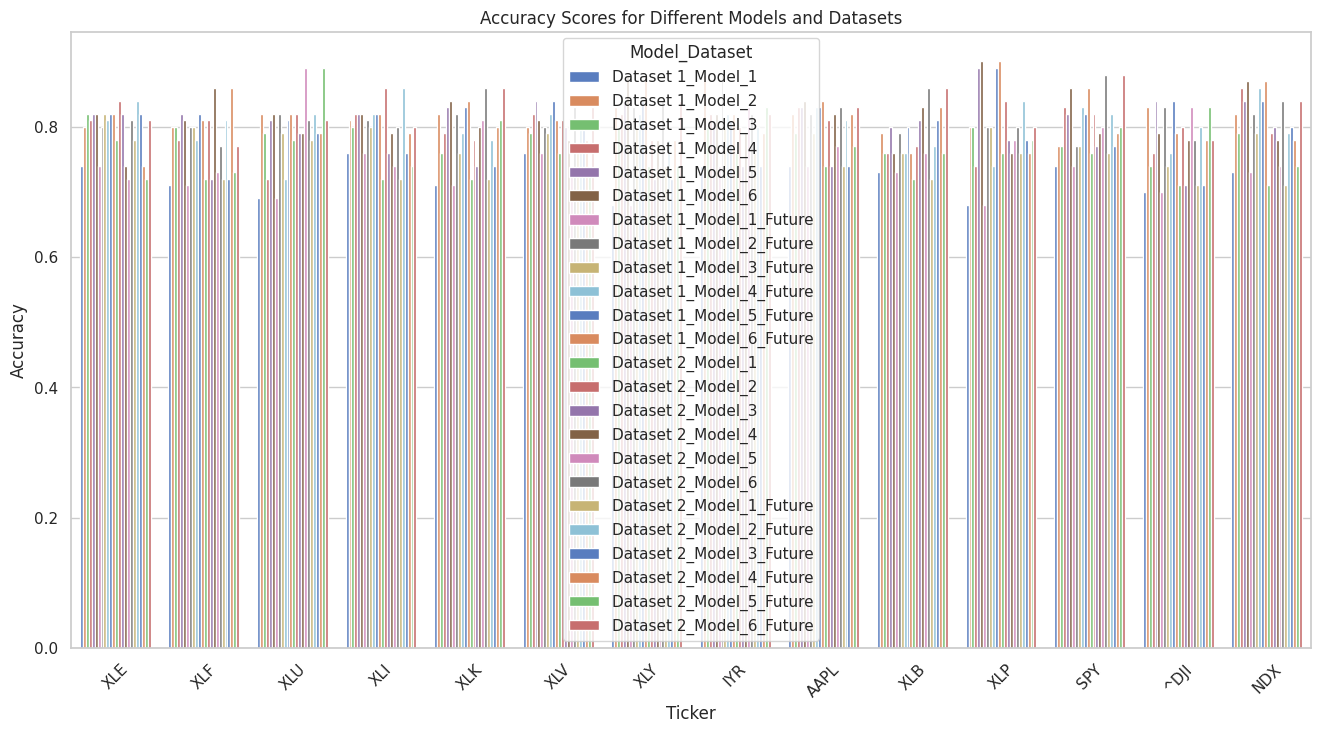

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and size of the plot
sns.set(style='whitegrid')
plt.figure(figsize=(16, 8))

# Flatten the MultiIndex DataFrame columns to create a new DataFrame for plotting
flat_columns = [f'{outer}_{inner}' for outer, inner in combined_results_df.columns]
flat_df = combined_results_df.copy()
flat_df.columns = flat_columns

# Melt the DataFrame to create a long format suitable for plotting
long_format_df = flat_df.reset_index().melt(id_vars='index', var_name='Model_Dataset', value_name='Accuracy')

# Create a grouped bar chart
ax = sns.barplot(data=long_format_df, x='index', y='Accuracy', hue='Model_Dataset', palette='muted')
ax.set(xlabel='Ticker', ylabel='Accuracy')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title to the plot
plt.title('Accuracy Scores for Different Models and Datasets')

# Show the plot
plt.show()

# Visulaizing specific ticker using decision tree classifier 

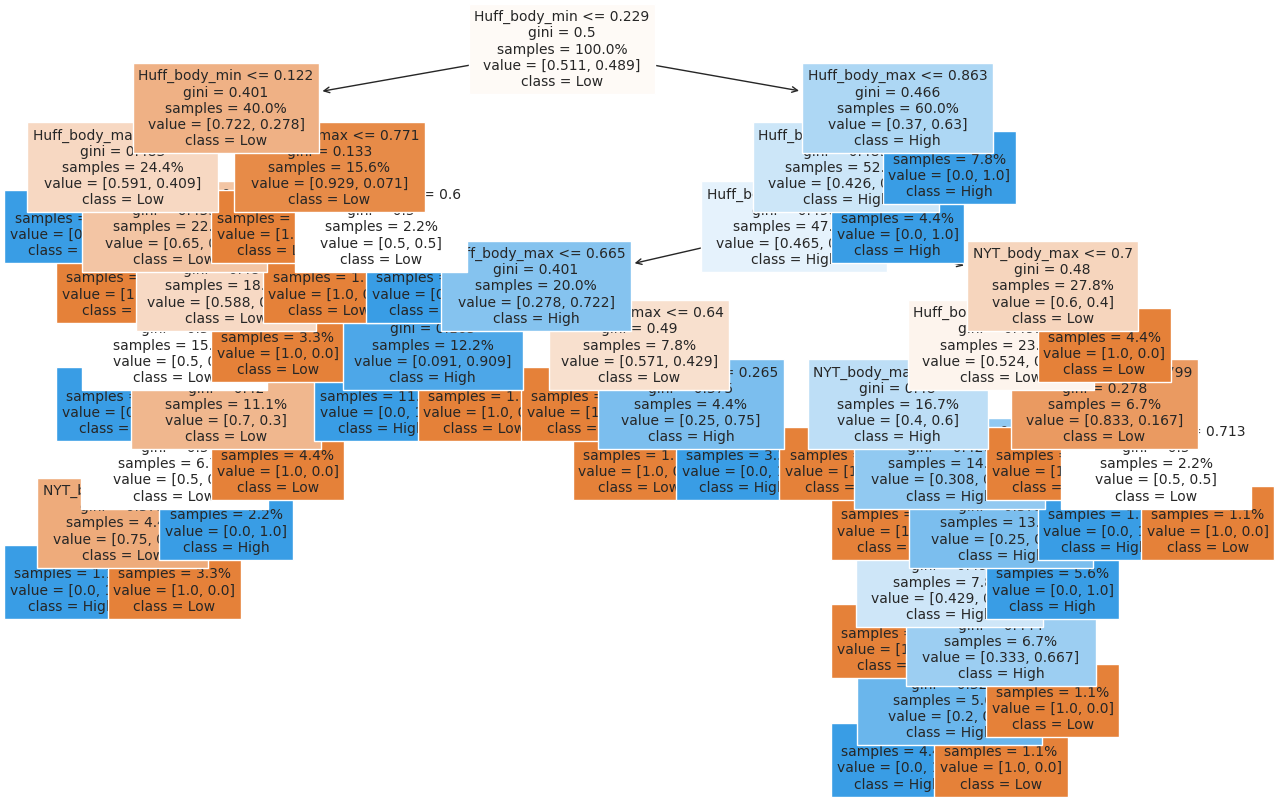

In [63]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Select a ticker and variable combination for visualization
ticker_to_visualize = 'XLU'
selected_var_to_visualize = ['guardian_body_min','guardian_body_max','Huff_body_min','Huff_body_max','NYT_body_min','NYT_body_max']

# Prepare the data
accuracy_df = stocks_df[[ticker_to_visualize] + selected_var_to_visualize]
y_nonscaled = accuracy_df[[ticker_to_visualize]]
X_nonscaled = accuracy_df.drop(columns=[ticker_to_visualize])

scaleOutput = MinMaxScaler()
scaleInput = MinMaxScaler()
y = scaleOutput.fit_transform(y_nonscaled)
X = scaleInput.fit_transform(X_nonscaled)

X_train = X[:90]
y_train = y[:90]
X_valid = X[35:]
y_valid = y[35:]

# Train the decision tree
stock_decision_tree = DecisionTreeClassifier(random_state=1)
stock_decision_tree.fit(X_train, y_train.ravel())

# Visualize the decision tree
plt.figure(figsize=(16, 10))
plot_tree(stock_decision_tree, filled=True, feature_names=selected_var_to_visualize, class_names=['Low', 'High'], proportion=True, fontsize=10)
plt.show()